<a href="https://colab.research.google.com/github/ETorresSacha/Analisis-de-datos/blob/main/analisis_datos_reto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import os
from google.colab import files
import seaborn as sns
from sklearn import  preprocessing
import random

In [ ]:
# Descargar el archivo
files.download('mnp_caex.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ANÁLISIS DE DATOS DEL RUL
### TABLA TELEMETRÍA Y ALERTAS

In [2]:
uploaded = files.upload()

Saving RUL_POTENCIA.xlsx to RUL_POTENCIA.xlsx


In [ ]:
# para borrar los datos que se sucbió
os.remove("CAEX_RUL4.xlsx")

In [111]:
data = pd.read_excel(io.BytesIO(uploaded['RUL_POTENCIA.xlsx']))

/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [112]:
# vamos a crear los ciclos por cada equipo

# Ordenamos primero por equipo y fecha
data = data.sort_values(by=['equipment','fecha_telemetria'])

# Definimos el inicio de un nuevo ciclo cuando:
# - cambia el equipo
# - o el RUL vuelve a subir (después de llegar a 0)
data["new_cycle"] = (
    (data["equipment"] != data["equipment"].shift()) |   # cambio de equipo
    (data["RUL_Horas"] > data["RUL_Horas"].shift())            # RUL "reinicia"
).astype(int)

# Ahora creamos un contador acumulativo de ciclos dentro de cada equipo
data["Ciclo"] = data.groupby("equipment")["new_cycle"].cumsum()

# Eliminamos la columna auxiliar
data = data.drop(columns=["new_cycle"])

In [103]:
data.reset_index(drop=True)

,equipment,fecha_telemetria,fecha_final,RUL_Horas,horometro,Ambient_Temp_Ave,Ambient_Temp_Max,Ambient_Temp_Min,Atmos_Pres_Ave,Blow_by_Press_Max,...,Motor_Power_B_at_Retard_Mode_Max,Motor_Torque_A_at_Retard_Mode_Ave,Motor_Torque_A_at_Retard_Mode_Max,Motor_Torque_B_at_Retard_Mode_Ave,Motor_Torque_B_at_Retard_Mode_Max,Steering_Press_Max,Wheel_Motor_A_Speed_Max,Wheel_Motor_B_Speed_Max,rn,Ciclo
0,C311,2021-01-08 01:34:46,2021-05-05 06:41:00,2813,39255,14,28.0,3.0,58,2.0,...,2160.0,6640,20090.0,6640,21200.0,32000,2753,2751,1,1
1,C311,2021-01-09 05:32:30,2021-05-05 06:41:00,2785,39275,14,29.0,5.0,58,2.0,...,2166.0,6860,21140.0,6860,20950.0,32000,2403,2435,1,1
2,C311,2021-01-10 18:19:32,2021-05-05 06:41:00,2748,39295,14,28.0,5.0,57,2.0,...,2126.0,6950,19740.0,6940,20390.0,32000,2609,2550,1,1
3,C311,2021-01-12 06:14:39,2021-05-05 06:41:00,2712,39315,15,25.0,5.0,57,2.0,...,2152.0,6710,19320.0,6710,19930.0,32000,2666,2642,1,1
4,C311,2021-01-13 21:43:13,2021-05-05 06:41:00,2673,39335,19,31.0,9.0,58,2.0,...,2134.0,7460,20660.0,7460,19840.0,32000,2913,2939,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,C333,2022-03-13 11:08:24,2022-04-23 03:51:00,976,17208,14,29.0,4.0,61,NaN,...,2265.0,7320,21410.0,7320,22080.0,20230,2660,2625,1,16
1154,C333,2022-03-15 04:41:47,2022-04-23 03:51:00,935,17228,13,30.0,5.0,61,NaN,...,2248.0,6930,20450.0,6940,19860.0,20440,2242,2171,1,16
1155,C333,2022-03-16 04:52:40,2022-04-23 03:51:00,911,17248,18,31.0,7.0,61,NaN,...,2269.0,7690,21690.0,7700,23900.0,20145,2587,2556,1,16
1156,C333,2022-03-17 16:23:37,2022-04-23 03:51:00,875,17268,12,27.0,3.0,60,NaN,...,2321.0,8680,21730.0,8690,22680.0,20483,2449,2367,1,16


In [113]:
data = data.drop(columns=['rn'])

In [114]:
# cantidad de equipos
print(data['equipment'].value_counts())

equipment
C311    270
C324    264
C330    249
C321    247
C333    245
C332    243
C323    232
C318    230
C315    218
C313    217
C327    217
C319    215
C301    213
C305    206
C304    203
C329    203
C317    194
C331    185
C307    180
C314    168
C309    166
C303    157
C316    155
C306    151
C326    132
C312    130
C325    128
C310    127
C322    112
C320     30
C302     27
C308      2
C328      2
Name: count, dtype: int64


In [116]:
data_C311 = data[data['equipment'] == 'C311']

In [119]:
data_C311.reset_index(drop=True)

,equipment,fecha_telemetria,fecha_final,RUL_Horas,horometro,Ambient_Temp_Ave,Ambient_Temp_Max,Ambient_Temp_Min,Atmos_Pres_Ave,Blow_by_Press_Max,...,Motor_Power_B_at_Retard_Mode_Ave,Motor_Power_B_at_Retard_Mode_Max,Motor_Torque_A_at_Retard_Mode_Ave,Motor_Torque_A_at_Retard_Mode_Max,Motor_Torque_B_at_Retard_Mode_Ave,Motor_Torque_B_at_Retard_Mode_Max,Steering_Press_Max,Wheel_Motor_A_Speed_Max,Wheel_Motor_B_Speed_Max,Ciclo
0,C311,2021-01-08 01:34:46,2021-05-05 06:41:00,2813,39255,14,28.0,3.0,58,2.0,...,750,2160.0,6640,20090.0,6640,21200.0,32000,2753,2751,1
1,C311,2021-01-09 05:32:30,2021-05-05 06:41:00,2785,39275,14,29.0,5.0,58,2.0,...,746,2166.0,6860,21140.0,6860,20950.0,32000,2403,2435,1
2,C311,2021-01-10 18:19:32,2021-05-05 06:41:00,2748,39295,14,28.0,5.0,57,2.0,...,758,2126.0,6950,19740.0,6940,20390.0,32000,2609,2550,1
3,C311,2021-01-12 06:14:39,2021-05-05 06:41:00,2712,39315,15,25.0,5.0,57,2.0,...,725,2152.0,6710,19320.0,6710,19930.0,32000,2666,2642,1
4,C311,2021-01-13 21:43:13,2021-05-05 06:41:00,2673,39335,19,31.0,9.0,58,2.0,...,837,2134.0,7460,20660.0,7460,19840.0,32000,2913,2939,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,C311,2022-03-10 05:24:09,2022-03-16 20:32:00,159,45315,16,35.0,6.0,58,1.0,...,930,2129.0,8090,19860.0,8090,19870.0,32000,2358,2344,8
266,C311,2022-03-12 04:47:37,2022-03-16 20:32:00,112,45355,14,30.0,5.0,58,1.0,...,557,2176.0,4890,20400.0,4890,19520.0,32000,2323,2340,8
267,C311,2022-03-14 09:24:54,2022-03-16 20:32:00,59,45395,16,31.0,4.0,59,1.0,...,0,NaN,0,NaN,0,NaN,32000,8,3,8
268,C311,2022-03-15 09:56:07,2022-03-16 20:32:00,35,45415,17,33.0,5.0,59,1.0,...,0,NaN,0,NaN,0,NaN,32000,0,0,8


In [123]:
data_C311 = data_C311.iloc[:,3:]

In [129]:
data_C311.reset_index(drop=True)

,RUL_Horas,horometro,Ambient_Temp_Ave,Ambient_Temp_Max,Ambient_Temp_Min,Atmos_Pres_Ave,Blow_by_Press_Max,Boost_LB_Press_Max,Boost_RB_Press_Max,BRAKE_ENERGY,...,Motor_Power_B_at_Retard_Mode_Ave,Motor_Power_B_at_Retard_Mode_Max,Motor_Torque_A_at_Retard_Mode_Ave,Motor_Torque_A_at_Retard_Mode_Max,Motor_Torque_B_at_Retard_Mode_Ave,Motor_Torque_B_at_Retard_Mode_Max,Steering_Press_Max,Wheel_Motor_A_Speed_Max,Wheel_Motor_B_Speed_Max,Ciclo
0,2813,39255,14,28.0,3.0,58,2.0,264,261.0,0,...,750,2160.0,6640,20090.0,6640,21200.0,32000,2753,2751,1
1,2785,39275,14,29.0,5.0,58,2.0,264,261.0,0,...,746,2166.0,6860,21140.0,6860,20950.0,32000,2403,2435,1
2,2748,39295,14,28.0,5.0,57,2.0,266,259.0,0,...,758,2126.0,6950,19740.0,6940,20390.0,32000,2609,2550,1
3,2712,39315,15,25.0,5.0,57,2.0,276,259.0,0,...,725,2152.0,6710,19320.0,6710,19930.0,32000,2666,2642,1
4,2673,39335,19,31.0,9.0,58,2.0,274,260.0,0,...,837,2134.0,7460,20660.0,7460,19840.0,32000,2913,2939,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,159,45315,16,35.0,6.0,58,1.0,266,259.0,0,...,930,2129.0,8090,19860.0,8090,19870.0,32000,2358,2344,8
266,112,45355,14,30.0,5.0,58,1.0,266,261.0,0,...,557,2176.0,4890,20400.0,4890,19520.0,32000,2323,2340,8
267,59,45395,16,31.0,4.0,59,1.0,266,260.0,0,...,0,NaN,0,NaN,0,NaN,32000,8,3,8
268,35,45415,17,33.0,5.0,59,1.0,262,257.0,0,...,0,NaN,0,NaN,0,NaN,32000,0,0,8


In [130]:
# Reemplazar NaN por la media en ese equipo
data_C311 = data_C311.fillna(data_C311.mean(numeric_only=True))

In [131]:
# Tratamiento de outliers

for col in data_C311.select_dtypes(include=[np.number]).columns:
    Q1 = data_C311[col].quantile(0.25)
    Q3 = data_C311[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Reemplazar outliers por NaN
    data_C311[col] = data_C311[col].mask((data_C311[col] < lower_limit) | (data_C311[col] > upper_limit), np.nan)

# Si quieres luego reemplazar por la mediana:
data_C311 = data_C311.fillna(data_C311.median(numeric_only=True))

In [132]:
# calcularemos la importancia de las variables (features)
from sklearn.ensemble import RandomForestRegressor

X = data_C311.drop(columns=["RUL_Horas"])
y = data_C311["RUL_Horas"]

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X, y)

importancess = pd.DataFrame({
    "feature": X.columns,
    "importance": model.feature_importances_
}).sort_values(by="importance", ascending=False)

data_C311.corr()["RUL_Horas"].sort_values(ascending=False)

,RUL_Horas
RUL_Horas,1.000000
Boost_RB_Press_Max,0.307542
Engine_Coolant_Temp_Max,0.282615
Boost_LB_Press_Max,0.279675
Motor_B_Power_Ave,0.268240
Motor_A_Power_Ave,0.236293
Brake_Oil_Temp_RF_Ave,0.185979
Brake_Oil_Temp_LF_Ave,0.183813
DC_Power_Ave,0.179339
Brake_Oil_Temp_RR_Ave,0.178835


In [134]:
importancess.head(30)

,feature,importance
0,horometro,0.563691
24,Engine_Coolant_Temp_Max,0.165585
54,Ciclo,0.081923
6,Boost_LB_Press_Max,0.045801
31,Exhaust_Temp_Max_RR,0.020084
5,Blow_by_Press_Max,0.008155
41,Motor_B_Power_Ave,0.007206
14,Brake_Oil_Temp_RF_Max,0.007069
7,Boost_RB_Press_Max,0.006822
36,Motor_A_Power_Ave,0.006490


In [4]:
# Clasificaremos los datos de los equipos que tienen mayor cantidad de mantenimientos: C333,C332,C331,C311 y C319
data = data[data['equipment'].isin(['C311', 'C324', 'C330', 'C321', 'C333'])]

###  Paso 1 – Exploración inicial de la data (EDA básico).

In [115]:
# Vista rápida de la estructura
print("Dimensiones del dataset:", data.shape)
print("\nTipos de datos:")
print(data.dtypes)

Dimensiones del dataset: (5718, 59)

Tipos de datos:
equipment                                          object
fecha_telemetria                           datetime64[ns]
fecha_final                                datetime64[ns]
RUL_Horas                                           int64
horometro                                           int64
Ambient_Temp_Ave                                    int64
Ambient_Temp_Max                                  float64
Ambient_Temp_Min                                  float64
Atmos_Pres_Ave                                      int64
Blow_by_Press_Max                                 float64
Boost_LB_Press_Max                                  int64
Boost_RB_Press_Max                                float64
BRAKE_ENERGY                                        int64
Brake_Oil_Temp_LF_Ave                               int64
Brake_Oil_Temp_LF_Max                               int64
Brake_Oil_Temp_LR_Ave                               int64
Brake_Oil_Temp_LR_M

In [6]:
# Distribución de equipos
print("\nCantidad de registros por ID de equipo:")
display(data['equipment'].value_counts())


Cantidad de registros por ID de equipo:


,count
equipment,
C311,270
C333,245
C332,243
C319,215
C331,185


In [7]:
#Creamos una copia de los datos
data_filtrado = data.copy()

In [8]:
# Ordenamos los datos, verificamos si existen filas completas con datos nulos
data_filtrado = data_filtrado.sort_values(by=['Ambient_Temp_Ave',	'Ambient_Temp_Max'], ascending= True, na_position='first')

In [9]:
data_filtrado.head()

,equipment,fecha_telemetria,fecha_final,RUL_Horas,horometro,Ambient_Temp_Ave,Ambient_Temp_Max,Ambient_Temp_Min,Atmos_Pres_Ave,Blow_by_Press_Max,...,Motor_Power_B_at_Retard_Mode_Ave,Motor_Power_B_at_Retard_Mode_Max,Motor_Torque_A_at_Retard_Mode_Ave,Motor_Torque_A_at_Retard_Mode_Max,Motor_Torque_B_at_Retard_Mode_Ave,Motor_Torque_B_at_Retard_Mode_Max,Steering_Press_Max,Wheel_Motor_A_Speed_Max,Wheel_Motor_B_Speed_Max,rn
5155,C331,2021-06-18 01:10:57,2021-06-20 03:29:00,50,14389,0,9.0,-6.0,60,NaN,...,621,2154.0,6620,20510.0,6580,21450.0,21536,2712,2718,1
5579,C333,2021-06-27 17:16:16,2021-07-10 20:24:00,315,13709,0,10.0,-10.0,60,NaN,...,864,2223.0,7770,20830.0,7800,23060.0,22252,2107,2114,1
5156,C331,2021-06-19 01:26:51,2021-06-20 03:29:00,26,14409,0,11.0,-6.0,60,NaN,...,541,2065.0,5810,21180.0,5790,21710.0,21366,2566,2561,1
5555,C333,2021-05-21 10:07:18,2021-05-23 23:18:00,61,13149,0,13.0,-10.0,60,NaN,...,765,2248.0,6850,21150.0,6860,20260.0,21957,2214,2196,1
5157,C331,2021-06-21 06:11:22,2021-06-23 06:57:00,48,14449,0,14.0,-5.0,60,NaN,...,750,2137.0,6950,21000.0,6920,20680.0,21452,2726,2733,1


In [10]:
# Resumen estadístico de todas las columnas numéricas
print("\nResumen estadístico:")
display(data_filtrado.describe())


Resumen estadístico:


,fecha_telemetria,fecha_final,RUL_Horas,horometro,Ambient_Temp_Ave,Ambient_Temp_Max,Ambient_Temp_Min,Atmos_Pres_Ave,Blow_by_Press_Max,Boost_LB_Press_Max,...,Motor_Power_B_at_Retard_Mode_Ave,Motor_Power_B_at_Retard_Mode_Max,Motor_Torque_A_at_Retard_Mode_Ave,Motor_Torque_A_at_Retard_Mode_Max,Motor_Torque_B_at_Retard_Mode_Ave,Motor_Torque_B_at_Retard_Mode_Max,Steering_Press_Max,Wheel_Motor_A_Speed_Max,Wheel_Motor_B_Speed_Max,rn
count,1158,1158,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,485.000000,1158.000000,...,1158.000000,1099.000000,1158.000000,1099.000000,1158.000000,1099.000000,1158.000000,1158.000000,1158.000000,1158.0
mean,2021-07-29 17:22:46.502590464,2021-09-06 22:53:51.243523328,941.485320,25777.414508,12.520725,27.328152,2.531088,59.419689,1.832990,261.917098,...,784.105354,2214.587807,7066.476684,21097.579618,7063.981002,21244.731574,23762.980138,2524.520725,2520.990501,1.0
min,2021-01-05 14:31:03,2021-02-03 16:46:00,0.000000,11329.000000,0.000000,9.000000,-64.000000,57.000000,0.000000,234.000000,...,0.000000,1965.000000,0.000000,18180.000000,0.000000,17840.000000,19472.000000,0.000000,0.000000,1.0
25%,2021-04-10 03:15:33.249999872,2021-05-12 23:53:00,205.250000,14029.250000,9.000000,22.000000,0.000000,58.000000,1.000000,254.000000,...,771.000000,2160.000000,7000.000000,20480.000000,6990.000000,20440.000000,21199.000000,2443.750000,2437.250000,1.0
50%,2021-07-11 15:32:25,2021-08-12 11:39:00,618.000000,16729.000000,13.000000,27.000000,4.000000,60.000000,2.000000,262.000000,...,825.000000,2205.000000,7370.000000,20980.000000,7370.000000,21110.000000,21661.000000,2654.000000,2649.000000,1.0
75%,2021-11-21 07:06:53,2022-02-04 15:57:00,1317.750000,40725.500000,16.000000,32.000000,6.000000,60.000000,2.000000,268.000000,...,876.750000,2257.500000,7810.000000,21565.000000,7817.500000,21815.000000,22167.000000,2844.500000,2846.750000,1.0
max,2022-03-23 00:08:46,2022-04-29 09:55:00,4344.000000,45435.000000,24.000000,49.000000,16.000000,62.000000,4.000000,302.000000,...,1111.000000,2827.000000,9490.000000,25760.000000,9480.000000,28380.000000,32000.000000,3364.000000,3403.000000,1.0
std,NaN,NaN,960.176106,13409.737819,5.031706,6.823450,7.943207,1.137873,0.635506,9.756590,...,201.730348,82.371356,1738.697400,952.507458,1737.863745,1179.056072,4591.594199,631.587334,631.364881,0.0



Distribución de RUL:


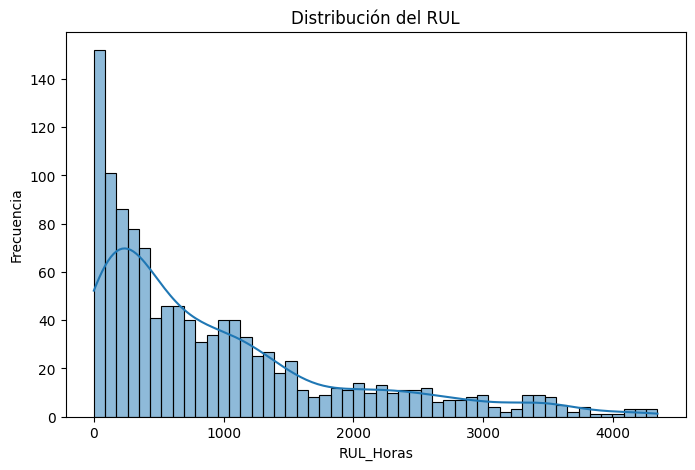

In [11]:
# Distribución de RUL
print("\nDistribución de RUL:")
plt.figure(figsize=(8,5))
sns.histplot(data_filtrado['RUL_Horas'], bins=50, kde=True)
plt.title("Distribución del RUL")
plt.xlabel("RUL_Horas")
plt.ylabel("Frecuencia")
plt.show()

# Paso 2: Limpieza inicial de datos

In [66]:
# La limpeza de datos lo realizaremos por equipo para evitar outliers erroneos
# Clasificación de datos por ID de quipo
# Equipo C311
C311_data = data_filtrado[data_filtrado['equipment'] == 'C311']

In [67]:
C311_data

,equipment,fecha_telemetria,fecha_final,RUL_Horas,horometro,Ambient_Temp_Ave,Ambient_Temp_Max,Ambient_Temp_Min,Atmos_Pres_Ave,Blow_by_Press_Max,...,Motor_Power_B_at_Retard_Mode_Ave,Motor_Power_B_at_Retard_Mode_Max,Motor_Torque_A_at_Retard_Mode_Ave,Motor_Torque_A_at_Retard_Mode_Max,Motor_Torque_B_at_Retard_Mode_Ave,Motor_Torque_B_at_Retard_Mode_Max,Steering_Press_Max,Wheel_Motor_A_Speed_Max,Wheel_Motor_B_Speed_Max,rn
1432,C311,2021-01-08 01:34:46,2021-05-05 06:41:00,2813,39255,14,28.0,3.0,58,2.0,...,750,2160.0,6640,20090.0,6640,21200.0,32000,2753,2751,1
1433,C311,2021-01-09 05:32:30,2021-05-05 06:41:00,2785,39275,14,29.0,5.0,58,2.0,...,746,2166.0,6860,21140.0,6860,20950.0,32000,2403,2435,1
1434,C311,2021-01-10 18:19:32,2021-05-05 06:41:00,2748,39295,14,28.0,5.0,57,2.0,...,758,2126.0,6950,19740.0,6940,20390.0,32000,2609,2550,1
1435,C311,2021-01-12 06:14:39,2021-05-05 06:41:00,2712,39315,15,25.0,5.0,57,2.0,...,725,2152.0,6710,19320.0,6710,19930.0,32000,2666,2642,1
1436,C311,2021-01-13 21:43:13,2021-05-05 06:41:00,2673,39335,19,31.0,9.0,58,2.0,...,837,2134.0,7460,20660.0,7460,19840.0,32000,2913,2939,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,C311,2022-03-10 05:24:09,2022-03-16 20:32:00,159,45315,16,35.0,6.0,58,1.0,...,930,2129.0,8090,19860.0,8090,19870.0,32000,2358,2344,1
1698,C311,2022-03-12 04:47:37,2022-03-16 20:32:00,112,45355,14,30.0,5.0,58,1.0,...,557,2176.0,4890,20400.0,4890,19520.0,32000,2323,2340,1
1699,C311,2022-03-14 09:24:54,2022-03-16 20:32:00,59,45395,16,31.0,4.0,59,1.0,...,0,NaN,0,NaN,0,NaN,32000,8,3,1
1700,C311,2022-03-15 09:56:07,2022-03-16 20:32:00,35,45415,17,33.0,5.0,59,1.0,...,0,NaN,0,NaN,0,NaN,32000,0,0,1


In [15]:
C311_data.shape

(270, 59)

In [16]:
# Resumen estadístico del equipo C311
print("\nResumen estadístico:")
display(C311_data.describe())


Resumen estadístico:


,fecha_telemetria,fecha_final,RUL_Horas,horometro,Ambient_Temp_Ave,Ambient_Temp_Max,Ambient_Temp_Min,Atmos_Pres_Ave,Blow_by_Press_Max,Boost_LB_Press_Max,...,Motor_Power_B_at_Retard_Mode_Ave,Motor_Power_B_at_Retard_Mode_Max,Motor_Torque_A_at_Retard_Mode_Ave,Motor_Torque_A_at_Retard_Mode_Max,Motor_Torque_B_at_Retard_Mode_Ave,Motor_Torque_B_at_Retard_Mode_Max,Steering_Press_Max,Wheel_Motor_A_Speed_Max,Wheel_Motor_B_Speed_Max,rn
count,270,270,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,...,270.000000,211.000000,270.000000,211.000000,270.000000,211.000000,270.0,270.000000,270.000000,270.0
mean,2021-08-13 09:15:22.492592384,2021-10-06 02:37:46.444444416,1289.262963,42327.370370,13.714815,29.370370,3.681481,58.129630,1.777778,261.600000,...,633.640741,2185.701422,5748.259259,20515.402844,5748.111111,20368.530806,32000.0,2063.322222,2063.407407,1.0
min,2021-01-08 01:34:46,2021-05-05 06:41:00,4.000000,39255.000000,0.000000,15.000000,-12.000000,57.000000,0.000000,236.000000,...,0.000000,2052.000000,0.000000,18180.000000,0.000000,17840.000000,32000.0,0.000000,0.000000,1.0
25%,2021-04-18 15:01:22.249999872,2021-05-05 06:41:00,342.000000,40760.000000,11.000000,24.000000,2.000000,58.000000,1.000000,258.000000,...,620.000000,2142.000000,6352.500000,19995.000000,6360.000000,19820.000000,32000.0,2255.500000,2241.000000,1.0
50%,2021-08-06 16:57:06,2021-09-27 22:38:00,1112.500000,42285.000000,14.000000,29.000000,4.000000,58.000000,2.000000,262.000000,...,799.000000,2176.000000,7105.000000,20450.000000,7095.000000,20320.000000,32000.0,2560.500000,2559.000000,1.0
75%,2021-12-15 18:18:48.249999872,2022-03-08 17:39:00,2026.000000,44030.000000,17.000000,33.000000,6.000000,58.000000,2.000000,266.000000,...,850.000000,2219.000000,7637.500000,20965.000000,7637.500000,20830.000000,32000.0,2784.500000,2773.500000,1.0
max,2022-03-16 13:07:43,2022-03-16 20:32:00,3872.000000,45435.000000,23.000000,49.000000,13.000000,61.000000,3.000000,298.000000,...,1052.000000,2460.000000,9150.000000,23070.000000,9150.000000,23840.000000,32000.0,3364.000000,3403.000000,1.0
std,NaN,NaN,1058.638711,1829.463003,4.652633,6.782594,4.311568,0.623168,0.658563,5.653173,...,344.115990,66.198626,3094.840821,757.854870,3094.522524,808.692197,0.0,1115.325183,1115.593808,0.0


In [68]:
# OBSERVACIÓN: Vamos a eliminar dos columnas para todos los equipos tratados, ya que solo existen datos en dos equipos, en los restantes
#               no existen ningún valor. Para evitar añadir un valor errorneo se tomará esta acción.

# Eliminar una sola columna
C311_data = C311_data.drop(columns=['Blow_by_Press_Max','Boost_RB_Press_Max'])

In [18]:
C311_data.shape

(270, 57)

In [69]:
# Reemplazar todos los ceros por NaN en toda la tabla
C311_data = C311_data.replace(0, np.nan)

In [20]:
# Verificamos si la data tiene datos con valor cero
(C311_data == 0).sum()

,0
equipment,0
fecha_telemetria,0
fecha_final,0
RUL_Horas,0
horometro,0
Ambient_Temp_Ave,0
Ambient_Temp_Max,0
Ambient_Temp_Min,0
Atmos_Pres_Ave,0
Boost_LB_Press_Max,0


In [70]:
# Revisar cantidad de valores nulos por columna
C311_data.isnull().sum().sort_values(ascending=False)

,0
Hoist_Press1_Max,267
BRAKE_ENERGY,258
Motor_Torque_A_at_Retard_Mode_Ave,59
Motor_Torque_B_at_Retard_Mode_Ave,59
Motor_Torque_A_at_Retard_Mode_Max,59
Motor_A_Power_Ave,59
Motor_A_Torque_Ave,59
Motor_A_Power_Max,59
Motor_A_Torque_Max,59
Motor_B_Power_Max,59


In [71]:
# Tratamiento de datos nulos
# Reemplazar NaN por la media en ese equipo
C311_data = C311_data.fillna(C311_data.mean(numeric_only=True))

In [23]:
C311_data.head()

,equipment,fecha_telemetria,fecha_final,RUL_Horas,horometro,Ambient_Temp_Ave,Ambient_Temp_Max,Ambient_Temp_Min,Atmos_Pres_Ave,Boost_LB_Press_Max,...,Motor_Power_B_at_Retard_Mode_Ave,Motor_Power_B_at_Retard_Mode_Max,Motor_Torque_A_at_Retard_Mode_Ave,Motor_Torque_A_at_Retard_Mode_Max,Motor_Torque_B_at_Retard_Mode_Ave,Motor_Torque_B_at_Retard_Mode_Max,Steering_Press_Max,Wheel_Motor_A_Speed_Max,Wheel_Motor_B_Speed_Max,rn
1540,C311,2021-06-27 12:53:23,2021-07-22 14:15:00,602,41735,13.765799,17.0,-10.0,58,266,...,680.0,2163.0,7430.0,20150.0,7440.0,20250.0,32000,2223.0,2241.0,1
1573,C311,2021-08-27 08:38:22,2021-09-27 22:38:00,758,42415,1.000000,17.0,-12.0,58,262,...,897.0,2128.0,7750.0,19390.0,7730.0,19030.0,32000,2824.0,2866.0,1
1522,C311,2021-05-21 10:12:56,2021-05-22 07:33:00,21,41315,1.000000,21.0,-8.0,57,270,...,671.0,2101.0,6660.0,19480.0,6660.0,19790.0,32000,2749.0,2741.0,1
1561,C311,2021-07-27 11:52:18,2021-09-27 22:38:00,1499,42175,2.000000,17.0,-5.0,58,254,...,934.0,2202.0,7870.0,23070.0,7870.0,20170.0,32000,2746.0,2757.0,1
1569,C311,2021-08-09 03:06:36,2021-09-27 22:38:00,1195,42335,3.000000,15.0,-6.0,58,264,...,898.0,2217.0,8150.0,20310.0,8150.0,20080.0,32000,2768.0,2763.0,1


In [72]:
# Imputar nulos usando la mediana de cada columna
C311_data = C311_data.fillna(C311_data.median(numeric_only=True))

# 4️⃣ Verificación
print("\nVerificación de nulos después de imputar:")
print(C311_data.isnull().sum().sum(), "valores nulos restantes")


Verificación de nulos después de imputar:
0 valores nulos restantes


In [ ]:
C311_data

,equipment,Ambient_Temp_Ave,Ambient_Temp_Max,Ambient_Temp_Min,Atmos_Pres_Ave,Boost_LB_Press_Max,BRAKE_ENERGY,Brake_Oil_Temp_LF_Ave,Brake_Oil_Temp_LF_Max,Brake_Oil_Temp_LR_Ave,...,Motor_Torque_A_at_Retard_Mode_Max,Motor_Torque_B_at_Retard_Mode_Ave,Motor_Torque_B_at_Retard_Mode_Max,Steering_Press_Max,Wheel_Motor_A_Speed_Max,Wheel_Motor_B_Speed_Max,fecha_telemetria,fecha_alerta,horometro,RUL_Horas
292,C311,13.769231,17.0,-10.0,58.0,266.0,1.25,25.0,42.0,26.0,...,20150.000000,7440.000000,20250.000000,32000.0,2223.000000,2241.000000,2021-06-27 12:53:23,2021-06-27 20:16:51,41735,8.000000
1219,C311,1.000000,17.0,-12.0,58.0,262.0,1.25,21.0,50.0,22.0,...,19390.000000,7730.000000,19030.000000,32000.0,2824.000000,2866.000000,2021-08-27 08:38:22,2021-08-28 00:16:34,42415,16.000000
1207,C311,1.000000,21.0,-8.0,57.0,270.0,1.25,36.0,48.0,36.0,...,19480.000000,6660.000000,19790.000000,32000.0,2749.000000,2741.000000,2021-05-21 10:12:56,2021-05-21 10:30:19,41315,31.913208
1216,C311,2.000000,17.0,-5.0,58.0,254.0,1.25,33.0,50.0,34.0,...,23070.000000,7870.000000,20170.000000,32000.0,2746.000000,2757.000000,2021-07-27 11:52:18,2021-08-11 20:55:36,42175,369.000000
295,C311,3.000000,15.0,-6.0,58.0,264.0,1.25,40.0,50.0,41.0,...,20310.000000,8150.000000,20080.000000,32000.0,2768.000000,2763.000000,2021-08-09 03:06:36,2021-08-11 20:55:36,42335,65.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5831,C311,22.000000,33.0,10.0,59.0,258.0,1.25,50.0,60.0,50.0,...,20440.000000,7460.000000,20230.000000,32000.0,2842.000000,2913.000000,2021-02-07 18:16:51,2021-02-10 14:05:21,39695,68.000000
280,C311,22.000000,36.0,12.0,58.0,254.0,2.00,53.0,73.0,53.0,...,20570.000000,6800.000000,19540.000000,32000.0,2834.000000,2774.000000,2021-03-07 21:42:19,2021-03-07 23:55:47,40075,2.000000
5850,C311,22.000000,36.0,12.0,59.0,262.0,1.25,62.0,70.0,61.0,...,20539.488372,7363.627907,20375.767442,32000.0,2564.131222,2552.594595,2021-12-19 18:14:00,2021-12-20 03:55:08,44115,9.000000
4926,C311,22.000000,49.0,11.0,58.0,264.0,1.25,65.0,73.0,64.0,...,20539.488372,7363.627907,20375.767442,32000.0,2564.131222,2552.594595,2021-12-31 12:38:35,2021-12-31 17:47:46,44335,5.000000


In [ ]:
# Resumen estadístico del equipo C311 - después de tratar los valores nulos
print("\nResumen estadístico:")
display(C311_data.describe())


Resumen estadístico:


,Ambient_Temp_Ave,Ambient_Temp_Max,Ambient_Temp_Min,Atmos_Pres_Ave,Boost_LB_Press_Max,BRAKE_ENERGY,Brake_Oil_Temp_LF_Ave,Brake_Oil_Temp_LF_Max,Brake_Oil_Temp_LR_Ave,Brake_Oil_Temp_LR_Max,...,Motor_Torque_A_at_Retard_Mode_Max,Motor_Torque_B_at_Retard_Mode_Ave,Motor_Torque_B_at_Retard_Mode_Max,Steering_Press_Max,Wheel_Motor_A_Speed_Max,Wheel_Motor_B_Speed_Max,fecha_telemetria,fecha_alerta,horometro,RUL_Horas
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,...,274.000000,274.000000,274.000000,274.0,274.000000,274.000000,274,274,274.000000,274.000000
mean,13.769231,29.379562,3.803030,58.131387,261.664234,1.250000,49.343066,61.014599,48.948905,58.678832,...,20539.488372,7363.627907,20375.767442,32000.0,2564.131222,2552.594595,2021-08-14 18:41:43.171532800,2021-08-16 01:32:47.952554496,42348.138686,31.913208
min,1.000000,15.000000,-12.000000,57.000000,236.000000,1.000000,20.000000,40.000000,20.000000,39.000000,...,18180.000000,4890.000000,17840.000000,32000.0,1.000000,1.000000,2020-11-15 06:19:24,2021-01-04 16:30:40,38575.000000,1.000000
25%,11.000000,24.000000,2.000000,58.000000,258.000000,1.250000,43.000000,55.000000,43.000000,53.000000,...,20140.000000,7070.000000,20002.500000,32000.0,2503.250000,2473.250000,2021-04-18 15:01:22.249999872,2021-04-19 03:07:40.500000,40760.000000,4.000000
50%,14.000000,29.000000,4.000000,58.000000,262.000000,1.250000,48.000000,59.000000,48.000000,57.000000,...,20539.488372,7363.627907,20375.767442,32000.0,2564.131222,2558.500000,2021-08-07 18:11:06,2021-08-11 20:55:36,42305.000000,9.000000
75%,17.000000,33.000000,6.000000,58.000000,266.000000,1.250000,58.750000,69.000000,57.000000,66.000000,...,20770.000000,7640.000000,20615.000000,32000.0,2780.000000,2771.250000,2021-12-17 16:17:46,2021-12-17 22:12:03.750000128,44070.000000,21.000000
max,23.000000,49.000000,13.000000,61.000000,298.000000,3.000000,66.000000,87.000000,64.000000,83.000000,...,23070.000000,9150.000000,23840.000000,32000.0,3364.000000,3403.000000,2022-03-20 01:45:08,2022-03-20 08:24:15,45495.000000,1210.000000
std,4.553492,6.740215,4.243399,0.620971,5.652031,0.124771,9.494118,8.158221,8.804612,7.500363,...,691.739443,553.379131,716.693794,0.0,445.295881,471.940897,NaN,NaN,1859.547289,94.825944


In [73]:
C311_data_copy = C311_data.copy()

In [74]:
C311_data_copy.head()

,equipment,fecha_telemetria,fecha_final,RUL_Horas,horometro,Ambient_Temp_Ave,Ambient_Temp_Max,Ambient_Temp_Min,Atmos_Pres_Ave,Boost_LB_Press_Max,...,Motor_Power_B_at_Retard_Mode_Ave,Motor_Power_B_at_Retard_Mode_Max,Motor_Torque_A_at_Retard_Mode_Ave,Motor_Torque_A_at_Retard_Mode_Max,Motor_Torque_B_at_Retard_Mode_Ave,Motor_Torque_B_at_Retard_Mode_Max,Steering_Press_Max,Wheel_Motor_A_Speed_Max,Wheel_Motor_B_Speed_Max,rn
1432,C311,2021-01-08 01:34:46,2021-05-05 06:41:00,2813,39255,14.0,28.0,3.0,58,264,...,750.0,2160.0,6640.0,20090.0,6640.0,21200.0,32000,2753.0,2751.0,1
1433,C311,2021-01-09 05:32:30,2021-05-05 06:41:00,2785,39275,14.0,29.0,5.0,58,264,...,746.0,2166.0,6860.0,21140.0,6860.0,20950.0,32000,2403.0,2435.0,1
1434,C311,2021-01-10 18:19:32,2021-05-05 06:41:00,2748,39295,14.0,28.0,5.0,57,266,...,758.0,2126.0,6950.0,19740.0,6940.0,20390.0,32000,2609.0,2550.0,1
1435,C311,2021-01-12 06:14:39,2021-05-05 06:41:00,2712,39315,15.0,25.0,5.0,57,276,...,725.0,2152.0,6710.0,19320.0,6710.0,19930.0,32000,2666.0,2642.0,1
1436,C311,2021-01-13 21:43:13,2021-05-05 06:41:00,2673,39335,19.0,31.0,9.0,58,274,...,837.0,2134.0,7460.0,20660.0,7460.0,19840.0,32000,2913.0,2939.0,1


In [75]:
C311_data_copy = C311_data_copy.iloc[:,3:]

In [76]:
C311_data_copy.drop(columns=['rn'])

,RUL_Horas,horometro,Ambient_Temp_Ave,Ambient_Temp_Max,Ambient_Temp_Min,Atmos_Pres_Ave,Boost_LB_Press_Max,BRAKE_ENERGY,Brake_Oil_Temp_LF_Ave,Brake_Oil_Temp_LF_Max,...,Motor_Power_A_at_Retard_Mode_Max,Motor_Power_B_at_Retard_Mode_Ave,Motor_Power_B_at_Retard_Mode_Max,Motor_Torque_A_at_Retard_Mode_Ave,Motor_Torque_A_at_Retard_Mode_Max,Motor_Torque_B_at_Retard_Mode_Ave,Motor_Torque_B_at_Retard_Mode_Max,Steering_Press_Max,Wheel_Motor_A_Speed_Max,Wheel_Motor_B_Speed_Max
1432,2813,39255,14.0,28.0,3.0,58,264,1.25,44,56,...,2163.00000,750.000000,2160.000000,6640.000000,20090.000000,6640.000000,21200.000000,32000,2753.000000,2751.00000
1433,2785,39275,14.0,29.0,5.0,58,264,1.25,44,53,...,2148.00000,746.000000,2166.000000,6860.000000,21140.000000,6860.000000,20950.000000,32000,2403.000000,2435.00000
1434,2748,39295,14.0,28.0,5.0,57,266,1.25,45,58,...,2128.00000,758.000000,2126.000000,6950.000000,19740.000000,6940.000000,20390.000000,32000,2609.000000,2550.00000
1435,2712,39315,15.0,25.0,5.0,57,276,1.25,45,54,...,2139.00000,725.000000,2152.000000,6710.000000,19320.000000,6710.000000,19930.000000,32000,2666.000000,2642.00000
1436,2673,39335,19.0,31.0,9.0,58,274,1.25,45,62,...,2156.00000,837.000000,2134.000000,7460.000000,20660.000000,7460.000000,19840.000000,32000,2913.000000,2939.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,159,45315,16.0,35.0,6.0,58,266,1.25,62,75,...,2099.00000,930.000000,2129.000000,8090.000000,19860.000000,8090.000000,19870.000000,32000,2358.000000,2344.00000
1698,112,45355,14.0,30.0,5.0,58,266,1.25,59,71,...,2089.00000,557.000000,2176.000000,4890.000000,20400.000000,4890.000000,19520.000000,32000,2323.000000,2340.00000
1699,59,45395,16.0,31.0,4.0,59,266,1.25,56,70,...,2166.63981,810.819905,2185.701422,7355.592417,20515.402844,7355.402844,20368.530806,32000,8.000000,3.00000
1700,35,45415,17.0,33.0,5.0,59,262,1.25,53,67,...,2166.63981,810.819905,2185.701422,7355.592417,20515.402844,7355.402844,20368.530806,32000,2567.267281,2555.59633


In [80]:
# Tratamiento de outliers

for col in C311_data_copy.select_dtypes(include=[np.number]).columns:
    Q1 = C311_data_copy[col].quantile(0.25)
    Q3 = C311_data_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Reemplazar outliers por NaN
    C311_data_copy[col] = C311_data_copy[col].mask((C311_data_copy[col] < lower_limit) | (C311_data_copy[col] > upper_limit), np.nan)

# Si quieres luego reemplazar por la mediana:
C311_data_copy = C311_data_copy.fillna(C311_data_copy.median(numeric_only=True))


In [81]:
# Función para visualizar la diferencia entre outlier

def comparar_variable_boxplot(df_original, df_tratada, variable):
    plt.figure(figsize=(8, 5))
    plt.boxplot(
        [df_original[variable].dropna(), df_tratada[variable].dropna()],
        labels=["Original", "Tratada"]
    )
    plt.title(f"Comparación de {variable}")
    plt.ylabel(variable)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.show()

/tmp/ipython-input-1458627279.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


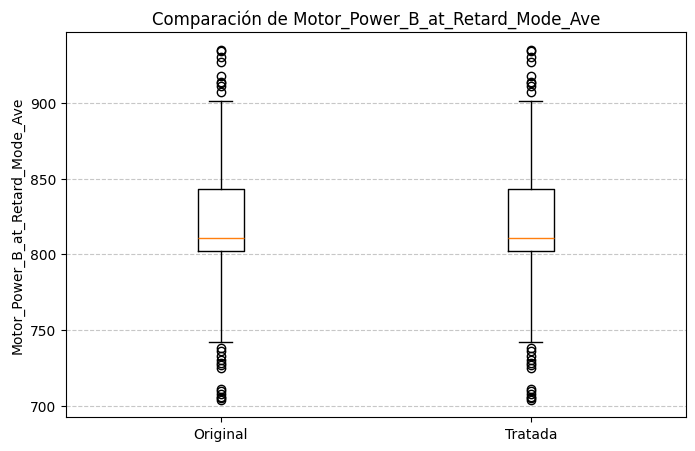

In [82]:
# LLamado de la función
variable_type=C311_data_copy.select_dtypes(include=['number']).columns.tolist()

comparar_variable_boxplot(C311_data_copy, C311_data_copy, random.choice(variable_type))

In [54]:
C311_data_copy

,RUL_Horas,horometro,Ambient_Temp_Ave,Ambient_Temp_Max,Ambient_Temp_Min,Atmos_Pres_Ave,Boost_LB_Press_Max,BRAKE_ENERGY,Brake_Oil_Temp_LF_Ave,Brake_Oil_Temp_LF_Max,...,Motor_Power_B_at_Retard_Mode_Ave,Motor_Power_B_at_Retard_Mode_Max,Motor_Torque_A_at_Retard_Mode_Ave,Motor_Torque_A_at_Retard_Mode_Max,Motor_Torque_B_at_Retard_Mode_Ave,Motor_Torque_B_at_Retard_Mode_Max,Steering_Press_Max,Wheel_Motor_A_Speed_Max,Wheel_Motor_B_Speed_Max,rn
1540,602,41735,13.765799,17.0,4.0,58.0,266.0,1.25,25,42,...,810.819905,2163.000000,7430.000000,20150.000000,7440.000000,20250.000000,32000,2223.000000,2241.00000,1
1573,758,42415,14.000000,17.0,4.0,58.0,262.0,1.25,21,50,...,897.000000,2128.000000,7750.000000,19390.000000,7730.000000,20368.530806,32000,2824.000000,2866.00000,1
1522,21,41315,14.000000,21.0,4.0,58.0,270.0,1.25,36,48,...,810.819905,2101.000000,6660.000000,19480.000000,6660.000000,19790.000000,32000,2749.000000,2741.00000,1
1561,1499,42175,2.000000,17.0,4.0,58.0,254.0,1.25,33,50,...,934.000000,2202.000000,7870.000000,20515.402844,7870.000000,20170.000000,32000,2746.000000,2757.00000,1
1569,1195,42335,3.000000,15.0,4.0,58.0,264.0,1.25,40,50,...,898.000000,2217.000000,8150.000000,20310.000000,8150.000000,20080.000000,32000,2768.000000,2763.00000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,1370,40095,22.000000,33.0,4.0,58.0,258.0,1.25,50,61,...,708.000000,2112.000000,6480.000000,19670.000000,6490.000000,19830.000000,32000,2629.000000,2578.00000,1
1471,1401,40075,22.000000,36.0,12.0,58.0,254.0,1.25,53,73,...,760.000000,2147.000000,6780.000000,20570.000000,6800.000000,19540.000000,32000,2834.000000,2774.00000,1
1638,1895,44115,22.000000,36.0,12.0,58.0,262.0,1.25,62,70,...,810.819905,2185.701422,7355.592417,20515.402844,7355.402844,20368.530806,32000,2567.267281,2555.59633,1
1648,1613,44335,22.000000,29.0,11.0,58.0,264.0,1.25,65,73,...,810.819905,2185.701422,7355.592417,20515.402844,7355.402844,20368.530806,32000,2567.267281,2555.59633,1


In [53]:
# correlación
C311_data_copy.corr()["RUL_Horas"].sort_values(ascending=False)

,RUL_Horas
RUL_Horas,1.000000
Engine_Coolant_Temp_Max,0.282615
Boost_LB_Press_Max,0.279675
Motor_B_Power_Ave,0.264187
Motor_A_Power_Ave,0.211550
Brake_Oil_Temp_RF_Ave,0.185979
Brake_Oil_Temp_LF_Ave,0.183813
DC_Power_Ave,0.179339
Brake_Oil_Temp_RR_Ave,0.178835
Brake_Oil_Temp_LR_Ave,0.177701


In [77]:
# Detectamos reinicio: cuando RUL actual > RUL anterior
C311_data_copy["nuevo_ciclo"] = (C311_data_copy["RUL_Horas"] > C311_data_copy["RUL_Horas"].shift()).astype(int)

# Creamos ciclo_id acumulando los reinicios
C311_data_copy["ciclo_id"] = C311_data_copy["nuevo_ciclo"].cumsum() + 1

In [79]:
C311_data_copy

,RUL_Horas,horometro,Ambient_Temp_Ave,Ambient_Temp_Max,Ambient_Temp_Min,Atmos_Pres_Ave,Boost_LB_Press_Max,BRAKE_ENERGY,Brake_Oil_Temp_LF_Ave,Brake_Oil_Temp_LF_Max,...,Motor_Torque_A_at_Retard_Mode_Ave,Motor_Torque_A_at_Retard_Mode_Max,Motor_Torque_B_at_Retard_Mode_Ave,Motor_Torque_B_at_Retard_Mode_Max,Steering_Press_Max,Wheel_Motor_A_Speed_Max,Wheel_Motor_B_Speed_Max,rn,nuevo_ciclo,ciclo_id
1432,2813,39255,14.0,28.0,3.0,58,264,1.25,44,56,...,6640.000000,20090.000000,6640.000000,21200.000000,32000,2753.000000,2751.00000,1,0,1
1433,2785,39275,14.0,29.0,5.0,58,264,1.25,44,53,...,6860.000000,21140.000000,6860.000000,20950.000000,32000,2403.000000,2435.00000,1,0,1
1434,2748,39295,14.0,28.0,5.0,57,266,1.25,45,58,...,6950.000000,19740.000000,6940.000000,20390.000000,32000,2609.000000,2550.00000,1,0,1
1435,2712,39315,15.0,25.0,5.0,57,276,1.25,45,54,...,6710.000000,19320.000000,6710.000000,19930.000000,32000,2666.000000,2642.00000,1,0,1
1436,2673,39335,19.0,31.0,9.0,58,274,1.25,45,62,...,7460.000000,20660.000000,7460.000000,19840.000000,32000,2913.000000,2939.00000,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,159,45315,16.0,35.0,6.0,58,266,1.25,62,75,...,8090.000000,19860.000000,8090.000000,19870.000000,32000,2358.000000,2344.00000,1,0,8
1698,112,45355,14.0,30.0,5.0,58,266,1.25,59,71,...,4890.000000,20400.000000,4890.000000,19520.000000,32000,2323.000000,2340.00000,1,0,8
1699,59,45395,16.0,31.0,4.0,59,266,1.25,56,70,...,7355.592417,20515.402844,7355.402844,20368.530806,32000,8.000000,3.00000,1,0,8
1700,35,45415,17.0,33.0,5.0,59,262,1.25,53,67,...,7355.592417,20515.402844,7355.402844,20368.530806,32000,2567.267281,2555.59633,1,0,8


In [64]:
data_filtrado = data_filtrado.sort_values(by=['equipment','fecha_telemetria'],ascending=[True, True])

In [65]:
data_filtrado

,equipment,fecha_telemetria,fecha_final,RUL_Horas,horometro,Ambient_Temp_Ave,Ambient_Temp_Max,Ambient_Temp_Min,Atmos_Pres_Ave,Blow_by_Press_Max,...,Motor_Power_B_at_Retard_Mode_Ave,Motor_Power_B_at_Retard_Mode_Max,Motor_Torque_A_at_Retard_Mode_Ave,Motor_Torque_A_at_Retard_Mode_Max,Motor_Torque_B_at_Retard_Mode_Ave,Motor_Torque_B_at_Retard_Mode_Max,Steering_Press_Max,Wheel_Motor_A_Speed_Max,Wheel_Motor_B_Speed_Max,rn
1432,C311,2021-01-08 01:34:46,2021-05-05 06:41:00,2813,39255,14,28.0,3.0,58,2.0,...,750,2160.0,6640,20090.0,6640,21200.0,32000,2753,2751,1
1433,C311,2021-01-09 05:32:30,2021-05-05 06:41:00,2785,39275,14,29.0,5.0,58,2.0,...,746,2166.0,6860,21140.0,6860,20950.0,32000,2403,2435,1
1434,C311,2021-01-10 18:19:32,2021-05-05 06:41:00,2748,39295,14,28.0,5.0,57,2.0,...,758,2126.0,6950,19740.0,6940,20390.0,32000,2609,2550,1
1435,C311,2021-01-12 06:14:39,2021-05-05 06:41:00,2712,39315,15,25.0,5.0,57,2.0,...,725,2152.0,6710,19320.0,6710,19930.0,32000,2666,2642,1
1436,C311,2021-01-13 21:43:13,2021-05-05 06:41:00,2673,39335,19,31.0,9.0,58,2.0,...,837,2134.0,7460,20660.0,7460,19840.0,32000,2913,2939,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5713,C333,2022-03-13 11:08:24,2022-04-23 03:51:00,976,17208,14,29.0,4.0,61,NaN,...,781,2265.0,7320,21410.0,7320,22080.0,20230,2660,2625,1
5714,C333,2022-03-15 04:41:47,2022-04-23 03:51:00,935,17228,13,30.0,5.0,61,NaN,...,737,2248.0,6930,20450.0,6940,19860.0,20440,2242,2171,1
5715,C333,2022-03-16 04:52:40,2022-04-23 03:51:00,911,17248,18,31.0,7.0,61,NaN,...,882,2269.0,7690,21690.0,7700,23900.0,20145,2587,2556,1
5716,C333,2022-03-17 16:23:37,2022-04-23 03:51:00,875,17268,12,27.0,3.0,60,NaN,...,913,2321.0,8680,21730.0,8690,22680.0,20483,2449,2367,1


In [90]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

X = C311_data_copy.drop(columns=["RUL_Horas"])
y = C311_data_copy["RUL_Horas"]

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X, y)

importances = pd.DataFrame({
    "feature": X.columns,
    "importance": model.feature_importances_
}).sort_values(by="importance", ascending=False)



In [91]:
importances.head(20)

,feature,importance
0,horometro,0.582995
22,Engine_Coolant_Temp_Max,0.165921
54,ciclo_id,0.073534
5,Boost_LB_Press_Max,0.048458
29,Exhaust_Temp_Max_RR,0.023747
12,Brake_Oil_Temp_RF_Max,0.007444
39,Motor_B_Power_Ave,0.007074
16,DC_Power_Ave,0.007016
32,Hoist_Press2_Max,0.004923
24,Engine_Oil_Filter_Differential_Pressure,0.004880


# MACHING LEARNIG

## random forest

In [83]:
# Dividimos las variables

# Seleccionar solo columnas numéricas
numeric_cols = C311_data_copy.select_dtypes(include=['number']).columns

# Eliminar 'RUL' y 'horometro' de X
X = C311_data_copy[numeric_cols].drop(columns=['RUL_Horas'], errors='ignore')
y = C311_data_copy["RUL_Horas"]

In [84]:
# Dividir en train y test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [85]:
# Entrenar Random Forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [86]:
# Hacer predicciones
y_pred = model.predict(X_test)

In [87]:
# Evaluar métricas

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


MAE: 241.07
MSE: 194239.37
RMSE: 440.73
R²: 0.8038


In [89]:
print('Reales: ',y_test[:5], 'Predicción: ',y_pred[:5])


Reales:  1462    1858
1548     297
1511     357
1559    1548
1628    2170
Name: RUL_Horas, dtype: int64 Predicción:  [1813.67   612.285  257.49   862.8   2122.75 ]


Según las métricas, nuestro modelo no ayuda en nada, es pésimo en la predicción, vamos a mejorarlo.

/tmp/ipython-input-983369781.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette="coolwarm")


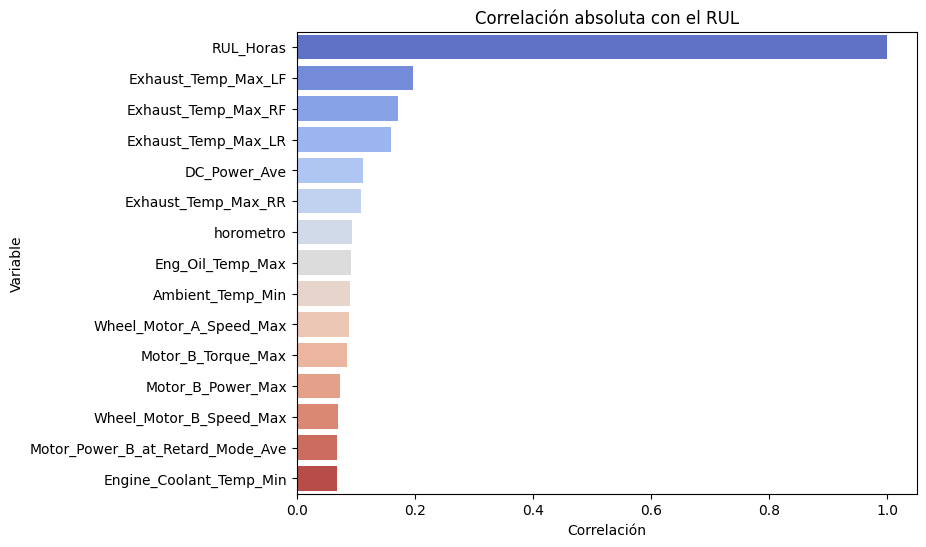

,RUL_Horas
RUL_Horas,1.000000
Exhaust_Temp_Max_LF,0.196662
Exhaust_Temp_Max_RF,0.172079
Exhaust_Temp_Max_LR,0.159803
DC_Power_Ave,0.111577
Exhaust_Temp_Max_RR,0.108666
Wheel_Motor_A_Speed_Max,0.089425
Wheel_Motor_B_Speed_Max,0.070141
Motor_Power_B_at_Retard_Mode_Ave,0.067782
Engine_Coolant_Temp_Min,0.067568


In [ ]:
# Paso 1 — Analizar correlación con el RUL
# Antes de tocar el modelo, necesitamos saber qué variables realmente aportan información.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular correlación de todas las variables con el RUL
correlations = C311_data.corr(numeric_only=True)['RUL_Horas'].sort_values(ascending=False)

# Mostrar las 15 más correlacionadas (positiva y negativamente)
top_corr = correlations.abs().sort_values(ascending=False).head(15)

plt.figure(figsize=(8,6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="coolwarm")
plt.title("Correlación absoluta con el RUL")
plt.xlabel("Correlación")
plt.ylabel("Variable")
plt.show()

correlations.head(15)


In [ ]:
# Paso 2 — Selección de variables
# Usar solo las más relevantes ayuda a reducir ruido:
# Tomar las 15 variables más correlacionadas con RUL
selected_features = top_corr.index.drop('RUL_Horas')
X = C311_data[selected_features]
y = C311_data['RUL_Horas']


In [ ]:
# Paso 3 — Mejorar el modelo
# Vamos a ajustar un RandomForestRegressor con búsqueda de hiperparámetros:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir modelo
rf = RandomForestRegressor(random_state=42)

# Rango de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Búsqueda de mejores parámetros
grid_search = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_

# Evaluar
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mejores parámetros:", grid_search.best_params_)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mejores parámetros: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
MAE: 7.69
MSE: 117.52
RMSE: 10.84
R²: 0.1072


In [ ]:
pip install xgboost lightgbm catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.0 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Lista de modelos a probar
modelos = {
    "XGBoost": XGBRegressor(n_estimators=200, random_state=42, n_jobs=-1),
    "LightGBM": LGBMRegressor(n_estimators=200, random_state=42, n_jobs=-1),
    "CatBoost": CatBoostRegressor(n_estimators=200, random_state=42, verbose=0)
}

resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    resultados.append([nombre, mae, mse, rmse, r2])

# Mostrar resultados en tabla
import pandas as pd
df_resultados = pd.DataFrame(resultados, columns=["Modelo", "MAE", "MSE", "RMSE", "R²"])
print(df_resultados)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 631
[LightGBM] [Info] Number of data points in the train set: 219, number of used features: 14
[LightGBM] [Info] Start training from score 11.065323
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

# PRUEBAS

In [ ]:
import numpy as np
import pandas as pd
#fecha_telemetria	fecha_alerta
# ========== CONFIGURACIÓN BÁSICA ==========
df = data_filtrado.copy()  # usa tu DataFrame limpio

# Detectar la columna de tiempo automáticamente si no es 'fecha'
time_col = 'fecha'
for cand in ['fecha', 'fecha_telemetria', 'timestamp', 'datetime']:
    if cand in df.columns:
        time_col = cand
        break

equipment_col = 'equipment'
target_col = 'RUL_Horas'
cols_a_excluir_de_X = ['horometro']  # ajusta si quieres excluir otras

# Asegurar tipo datetime y ordenar por equipo y tiempo
df[time_col] = pd.to_datetime(df[time_col], errors='coerce')
df = df.sort_values([equipment_col, time_col]).reset_index(drop=True)

# Identificar columnas numéricas candidatas a features (sensores)
num_cols = df.select_dtypes(include='number').columns.tolist()
# Excluir objetivo y posibles columnas a excluir
sensores = [c for c in num_cols if c not in [target_col] + cols_a_excluir_de_X]

# También podemos codificar el equipo como número (feature categórica codificada)
df['equipment_code'] = df[equipment_col].astype('category').cat.codes

# ========== FUNCIONES AUXILIARES ==========
def rolling_slope(x):
    """Pendiente (slope) de una regresión lineal simple sobre la ventana."""
    # x llega como array/serie del tamaño de la ventana
    idx = np.arange(len(x))
    # Evitar problemas cuando hay NaNs o ventana muy corta
    if np.sum(np.isfinite(x)) < 2:
        return np.nan
    # polyfit grado 1: slope = coef[0]
    return np.polyfit(idx, x, 1)[0]

# ========== CREACIÓN DE FEATURES ==========
# Ventanas seleccionadas
win_means = [5, 10, 20]
win_stds  = [5, 10, 20]
win_slopes = [10, 20]

# Calcularemos todo "por equipo"
g = df.groupby(equipment_col, group_keys=False)

for col in sensores:
    # Promedios móviles
    for w in win_means:
        df[f'{col}__rollmean_{w}'] = g[col].apply(lambda s: s.rolling(w, min_periods=max(2, w//2)).mean())

    # Desvios móviles
    for w in win_stds:
        df[f'{col}__rollstd_{w}'] = g[col].apply(lambda s: s.rolling(w, min_periods=max(2, w//2)).std())

    # Pendientes (tasa de cambio)
    for w in win_slopes:
        df[f'{col}__slope_{w}'] = g[col].apply(lambda s: s.rolling(w, min_periods=max(2, w//2)).apply(rolling_slope, raw=False))

    # Cambios inmediatos
    df[f'{col}__diff1'] = g[col].diff(1)
    df[f'{col}__pctchg1'] = g[col].pct_change(1)

    # EMA (suavizado)
    df[f'{col}__ema_10'] = g[col].apply(lambda s: s.ewm(span=10, adjust=False).mean())

    # Z-score dinámico usando mean y std de ventana 20 (si existen)
    mean20 = df[f'{col}__rollmean_20'] if f'{col}__rollmean_20' in df.columns else g[col].apply(lambda s: s.rolling(20, min_periods=5).mean())
    std20  = df[f'{col}__rollstd_20']  if f'{col}__rollstd_20'  in df.columns else g[col].apply(lambda s: s.rolling(20, min_periods=5).std())
    df[f'{col}__z_20'] = (df[col] - mean20) / (std20.replace(0, np.nan))

    # Desviación vs baseline por equipo (mediana del equipo)
    baseline = g[col].transform('median')
    df[f'{col}__dev_baseline'] = df[col] - baseline
    df[f'{col}__dev_baseline_pct'] = (df[col] / baseline) - 1.0

# Lista final de features
feature_cols = []

# Incluimos: sensores crudos + features creadas + código de equipo
feature_cols += sensores
feature_cols += [c for c in df.columns if '__' in c]  # todas las creadas
feature_cols += ['equipment_code']

# Si deseas, puedes eliminar columnas con demasiados NaNs recién creados:
# thresh = int(0.9 * len(df))  # requiere 90% no-nulos
# cols_keep = [c for c in feature_cols if df[c].notna().sum() >= thresh]
# feature_cols = cols_keep


/tmp/ipython-input-3837881940.py:65: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[f'{col}__pctchg1'] = g[col].pct_change(1)
/tmp/ipython-input-3837881940.py:65: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[f'{col}__pctchg1'] = g[col].pct_change(1)
/tmp/ipython-input-3837881940.py:73: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}__

In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --- Train/Test temporal ---
cutoff = df[time_col].quantile(0.80)  # 80% tiempo → train; 20% más reciente → test
train_mask = df[time_col] <= cutoff
test_mask  = df[time_col] >  cutoff

X_train = df.loc[train_mask, feature_cols]
y_train = df.loc[train_mask, target_col]
X_test  = df.loc[test_mask,  feature_cols]
y_test  = df.loc[test_mask,  target_col]

print("Tamaños ->",
      "Train:", X_train.shape,
      "Test:", X_test.shape)

# --- Modelo CatBoost (maneja NaN sin imputar y no requiere escalar) ---
cat_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    random_seed=42,
    verbose=False
)

# Early stopping usando el conjunto de test como eval_set (rápido para empezar)
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=False)

# --- Evaluación ---
y_pred = cat_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.3f}")
print(f"MSE : {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²  : {r2:.4f}")

# Importancias de variables (top 20)
import pandas as pd
fi = pd.DataFrame({
    'feature': feature_cols,
    'importance': cat_model.get_feature_importance()
}).sort_values('importance', ascending=False)

print("\nTop 20 features más importantes:")
print(fi.head(20))


Tamaños -> Train: (980, 796) Test: (245, 796)
MAE : 14.358
MSE : 338.819
RMSE: 18.407
R²  : -4.7071

Top 20 features más importantes:
                                            feature  importance
488                      Fuel_Rate_Ave__rollmean_10   20.976670
655    Motor_Power_A_at_Retard_Mode_Max__rollmean_5    5.272400
489                      Fuel_Rate_Ave__rollmean_20    3.664730
693        Motor_Power_B_at_Retard_Mode_Max__ema_10    3.481940
614                  Motor_B_Power_Ave__rollmean_10    3.128738
57                     Ambient_Temp_Ave__rollstd_10    2.629523
317                      DC_Power_Max__dev_baseline    2.612408
278                    Brake_Power_Max__rollmean_10    2.521921
45                 Motor_Power_B_at_Retard_Mode_Max    1.297838
667  Motor_Power_A_at_Retard_Mode_Max__dev_baseline    1.224345
94               Ambient_Temp_Min__dev_baseline_pct    1.189624
68                    Ambient_Temp_Max__rollmean_10    1.127680
159                             BR